In [1]:
import sqlite3
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

In [3]:
con = sqlite3.connect(":memory:")
cur = con.cursor()

In [4]:
df_ratings = pd.read_csv("E:/git_exercise/Final/edges/rec-libimseti-dir.edges", delim_whitespace=True, skiprows=1, names=["id_from", "id_to", "rating"])

In [5]:
# —Å–æ–∑–¥–∞–µ–º —Ç–∞–±–ª–∏—Ü—É
df_ratings.to_sql('ratings', con, index=False, if_exists='replace')

17359346

In [6]:
# —Å—á–∏—Ç—ã–≤–∞–µ–º  –¥–∞—Ç–∞—Å–µ—Ç info
df_info = pd.read_csv('E:/git_exercise/Final/edges/info.csv', names=["id", "gender", "1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12"])

C:\Users\albom\AppData\Local\Temp\ipykernel_1132\3540005613.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_info = pd.read_csv('E:/git_exercise/Final/edges/info.csv', names=["id", "gender", "1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12"])


In [7]:
#—Å–æ–∑–¥–∞–µ–º —Ç–∞–±–ª–∏—Ü—É
df_info.to_sql('info', con, index=False, if_exists='replace')

220971

In [8]:
data=pd.read_sql(
    '''
    SELECT r.id_from,i.gender,r.id_to,r.rating FROM info i
    join ratings r on r.id_from=i.id order by r.id_from
    ''',
    con,
)

In [9]:
data

id_from gender   id_to  rating
0               1      F     133       8
1               1      F     720       6
2               1      F     971      10
3               1      F    1095       7
4               1      F    1616      10
...           ...    ...     ...     ...
17359341   135359      F  215145       8
17359342   135359      F  215718       4
17359343   135359      F  218646      10
17359344   135359      F  218857       7
17359345   135359      F  218988       5

[17359346 rows x 4 columns]

In [10]:
#–°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ –¥–∞—Ç–∞—Å–µ—Ç–∞ –ø–æ –ø–æ–ª—É
df_info['gender'].value_counts()

gender
U          83164
M          76441
F          61365
 gender        1
Name: count, dtype: int64

In [11]:
#–ù–∞—Ö–æ–¥–∏–º —Å—Ä–µ–¥–Ω–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è —Ä–µ–π—Ç–∏–Ω–≥–∞ –¥–ª—è –∫–∞–∂–¥—É–æ–≥–æ –ª–∞–π–∫–Ω—É—Ç–æ–≥–æ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è
mean_ratings_to=pd.DataFrame(df_ratings.groupby('id_to')['rating'].mean())

In [12]:
# –°—á–∏—Ç–∞–µ–º —á–∏—Å–ª–æ –æ—Ü–µ–Ω–æ–∫ –ª–∞–π–∫–Ω—É—Ç—ã—Ö –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π
mean_ratings_to['number of rating'] = pd.DataFrame(df_ratings.groupby('id_to')['rating'].count())

In [13]:
# –¢–µ–ø–µ—Ä—å —Ç–µ –∂–µ –¥–≤–∞ –¥–µ–π—Å—Ç–≤–∏—è –¥–ª—è –ª–∞–π–∫–Ω—É–≤—à–∏—Ö –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π
mean_ratings_from =pd.DataFrame(df_ratings.groupby('id_from')['rating'].mean())

In [14]:
mean_ratings_from['number of rating'] = pd.DataFrame(df_ratings.groupby('id_from')['rating'].count())

In [15]:
#–í—ã–±–∏—Ä–∞–µ–º –∞–∫—Ç–∏–≤–Ω–æ –ª–∞–π–∫–∞–≤—à–∏—Ö –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π (–∫—Ç–æ –æ—Ü–µ–Ω–∏–ª –±–æ–ª–µ–µ, –Ω–∞–ø—Ä–∏–º–µ—Ä, 200 —Ä–∞–∑)
new_meanrate_from = mean_ratings_from[mean_ratings_from['number of rating'] > 200]

In [17]:
#–°–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ –∏–Ω–¥–µ–∫—Å–æ–≤
index_from = new_meanrate_from.index

In [18]:
# –¢–µ–ø–µ—Ä—å —Ç–µ –∂–µ –¥–≤–∞ –¥–µ–π—Å—Ç–≤–∏—è –¥–ª—è –ª–∞–π–∫–Ω—É—Ç—ã—Ö –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π
new_meanrate_to = mean_ratings_to[mean_ratings_to['number of rating'] > 300 ]
index_to = new_meanrate_to.index

In [19]:
# –î–µ–ª–∞–µ–º —Å—ç–º–ø–ª, –≥–¥–µ –≥–¥–µ 'id_from' —Å–æ–≤–ø–∞–¥–∞–µ—Ç —Å –æ–¥–Ω–∏–º –∏–∑ –∏–Ω–¥–µ–∫—Å–æ–≤ –≤ 'index_from', –∏ 'id_to' —Å–æ–≤–ø–∞–¥–∞–µ—Ç —Å –æ–¥–Ω–∏–º –∏–∑ –∏–Ω–¥–µ–∫—Å–æ–≤ –≤ 'index_to'
df_ratings_sample = df_ratings.loc[(df_ratings['id_from'].isin(index_from)) & (df_ratings['id_to'].isin(index_to))]

In [20]:
# –°–æ–∫—Ä–∞—Ç–∏–ª–∏ —Ä–∞–∑–º–µ—Ä —Å 17+ –º–ª–Ω –¥–æ 4,7 –º–ª–Ω –∑–∞–ø–∏—Å–µ–π
df_ratings_sample.shape

(4738218, 3)

In [21]:
#–£–Ω–∏–∫–∞–ª—å–Ω—ã–µ id –≤ —Å—Ç–æ–ª–±—Ü–∞—Ö
df_ratings_sample['id_from'].nunique(), df_ratings_sample['id_to'].nunique()

(15874, 12459)

In [22]:
#–¢–∞–∫ –∂–µ, –∫–∞–∫ –∏ –≤—ã—à–µ, –Ω–∞—Ö–æ–¥–∏–º —Å—Ä–µ–¥–Ω–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è –∏ —á–∏—Å–ª–æ –æ—Ü–µ–Ω–æ–∫, –Ω–æ —É–∂–µ –≤ —Å—ç–º–ø–ª–µ
mean_ratings_to = pd.DataFrame(df_ratings_sample.groupby('id_to')['rating'].mean())
mean_ratings_to['number of rating'] = pd.DataFrame(df_ratings_sample.groupby('id_to')['rating'].count())
mean_ratings_from =pd.DataFrame(df_ratings_sample.groupby('id_from')['rating'].mean())
mean_ratings_from['number of rating'] = pd.DataFrame(df_ratings_sample.groupby('id_from')['rating'].count())

–í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è:

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

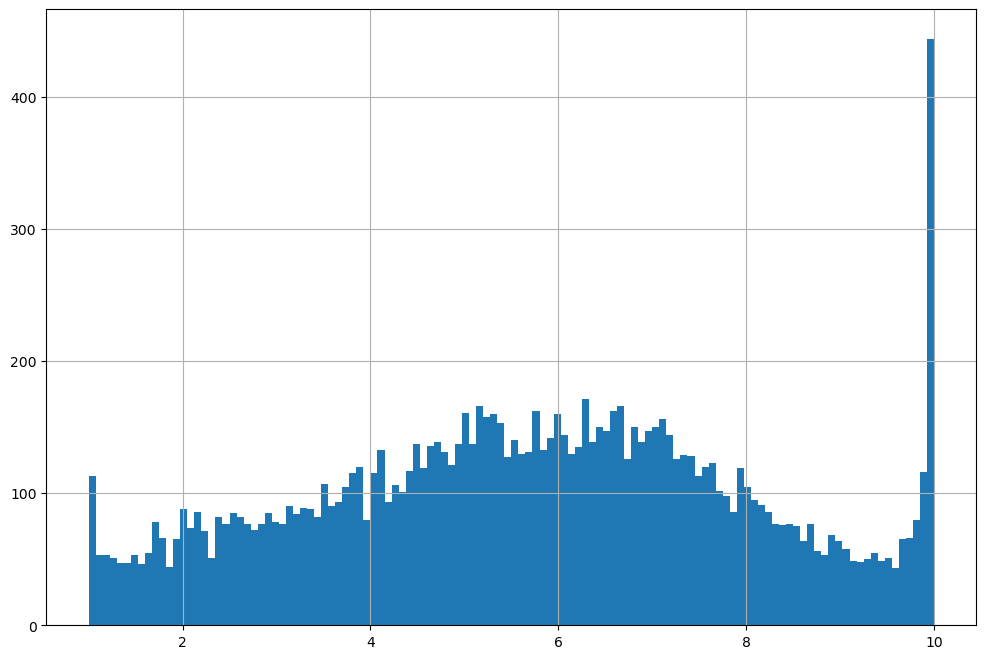

In [24]:
plt.figure(figsize=(12,8))
mean_ratings_to['rating'].hist(bins=120)

–ü–æ –≥—Ä–∞—Ñ–∏–∫—É, –µ—Å—Ç—å –¥–≤–∞ –ø–∏–∫–∞: –±–æ–ª—å—à–æ–µ —á–∏—Å–ª–æ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π, –∫–æ—Ç–æ—Ä—ã—Ö –æ—Ü–µ–Ω–∏–ª–∏ –ø–æ –º–∞–∫—Å–∏–º—É–º—É (10) –∏ –º–µ–Ω—å—à–µ–µ, –Ω–æ —Ç–æ–∂–µ –≤—ã–¥–µ–ª—è—é—â–µ–µ—Å—è - –∫–æ–≥–æ –æ—Ü–µ–Ω–∏–ª–∏ –º–∏–Ω–∏–º–∞–ª—å–Ω–æ (1). –û—Å—Ç–∞–ª—å–Ω—ã–µ, –≤ —Ü–µ–ª–æ–º, —É–∫–ª–∞–¥—ã–≤–∞—é—Ç—Å—è –≤ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ.

In [25]:
#–°–æ—Ä—Ç–∏—Ä—É–µ–º –ø–æ —É–±—ã–≤–∞–Ω–∏—é
mean_ratings_to['number of rating'].sort_values(ascending=False).head()

id_to
68989     7104
83773     6959
156148    6887
179192    6426
155380    5899
Name: number of rating, dtype: int64

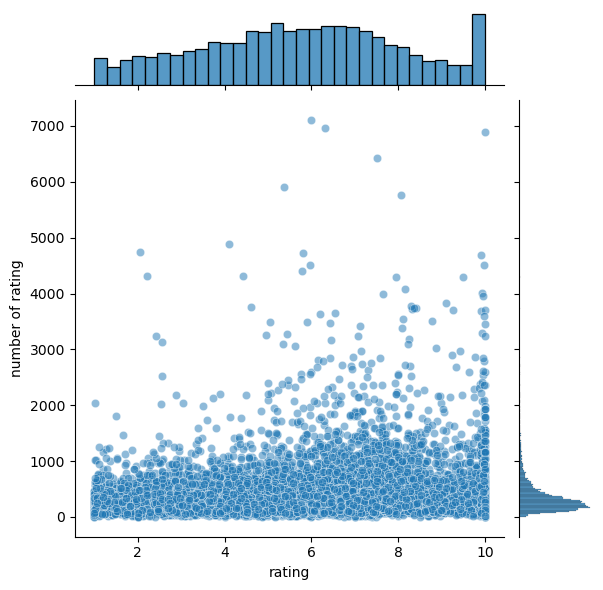

In [26]:
# –°—Ç—Ä–æ–∏–º —Å–æ–≤–º–µ—Å—Ç–Ω—ã–π –≥—Ä–∞—Ñ–∏–∫
sns.jointplot(x='rating',y='number of rating',data=mean_ratings_to,alpha=0.5)

–ù–∞–∏–±–æ–ª—å—à–µ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ—Ü–µ–Ω–æ–∫ —É –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π —Å —Ä–µ–π—Ç–∏–Ω–≥–∞–º–∏ 6-8 –∏ 10

–í–æ–∑—å–º–µ–º –¥–≤–∞ –æ—Å–Ω–æ–≤–Ω—ã—Ö –º–µ—Ç–æ–¥–∞: 
1.Popularity based recommendation 
2.Content based recommendation 

In [28]:
#Popularity based recommendation –≤—ã–≤–µ–¥–µ—Ç —Ä–µ–∫–æ–º–µ–Ω–¥–æ–≤–∞–Ω–Ω—ã—Ö –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π, –∫–æ—Ç–æ—Ä—ã–µ –≤—ã—Å–æ–∫–æ –æ—Ü–µ–Ω–∏–≤–∞–ª–∏—Å—å —á–∞—â–µ –≤—Å–µ–≥–æ 
#(–≤ –Ω–∞—à–µ–º —Å–ª—É—á–∞–µ, —Ä–µ–π—Ç–∏–Ω–≥ –≤—ã—à–µ 6)
df_to = mean_ratings_to.sort_values(['number of rating','rating'],ascending=[False,False])
df_to.head()

rating  number of rating
id_to                             
68989   5.988035              7104
83773   6.318293              6959
156148  9.996370              6887
179192  7.521008              6426
155380  5.371588              5899

In [30]:
len(mean_ratings_to[(mean_ratings_to['number of rating'] > 10000) & (mean_ratings_to['rating'] > 6)])

0

In [33]:
#Defining Popularity Based Model
def popular_recommend_model(id_from,df_to,threshold,k):
  """
–≠—Ç–æ—Ç –∫–æ–¥ –≤–æ–∑–≤—Ä–∞—â–∞–µ—Ç –≤–µ—Ä—Ö–Ω–∏–µ 'k' –ø—Ä–æ—Ñ–∏–ª–µ–π –Ω–∞ –æ—Å–Ω–æ–≤–µ —Å–∞–º–æ–≥–æ –≤—ã—Å–æ–∫–æ–≥–æ —Ä–µ–π—Ç–∏–Ω–≥–∞ –∏ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ —Ä–µ–π—Ç–∏–Ω–≥–æ–≤, 
–ø—Ä–µ–≤—ã—à–∞—é—â–∏—Ö –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–Ω—ã–π –ø–æ—Ä–æ–≥, –Ω–µ–∑–∞–≤–∏—Å–∏–º–æ –æ—Ç –∏–¥–µ–Ω—Ç–∏—Ñ–∏–∫–∞—Ç–æ—Ä–∞ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è. 
–ï—Å–ª–∏ –∑–Ω–∞—á–µ–Ω–∏–µ k –±–æ–ª—å—à–µ, —á–µ–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ—Ñ–∏–ª–µ–π, —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–∏—Ö –∫—Ä–∏—Ç–µ—Ä–∏—è–º, 
–æ–Ω –ø—Ä–æ—Å—Ç–æ –≤–æ–∑–≤—Ä–∞—â–∞–µ—Ç –º–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ—Ñ–∏–ª–µ–π, —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–∏—Ö –∫—Ä–∏—Ç–µ—Ä–∏—è–º.
  """
 # try:
#   if len(profile_df[(profile_df['number of rating'] > threshold) & (profile_df['Rating'] > 6)]) < 1:
#     print("Your filtering doesn't match any profiles")
  return (df_to[(df_to['number of rating'] > threshold) & (df_to['rating'] > 6)].head(k).index)
 # except:
 #   print("Index out of range")

In [37]:
popular_recommend_model(98447,mean_ratings_to,2500,10)

Index([328, 1029, 1561, 5962, 6036, 6437, 7006, 10148, 12513, 14258], dtype='int64', name='id_to')

In [38]:
#2. Content- Based Recommendation
'''
–≠—Ç–æ—Ç –∫–æ–¥ –ø—Ä–æ–≤–µ—Ä–∏—Ç —Å—Ö–æ–¥—Å—Ç–≤–æ –ø—Ä–æ—Ñ–∏–ª–µ–π –Ω–∞ –æ—Å–Ω–æ–≤–µ —Ä–∞–∑–ª–∏—á–Ω—ã—Ö —Å–∫—Ä—ã—Ç—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –∏ –ø—Ä–µ–¥–ª–æ–∂–∏—Ç –ø—Ä–æ—Ñ–∏–ª–∏, 
–ø–æ—Ö–æ–∂–∏–µ –Ω–∞ —Ç–µ, –∫–æ—Ç–æ—Ä—ã–µ –±—ã–ª–∏ –æ—Ü–µ–Ω–µ–Ω—ã –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–º —Ä–∞–Ω–µ–µ, 
—Å–æ–∑–¥–∞–≤ –º–∞—Ç—Ä–∏—Ü—É –ø—Ä–æ—Ñ–∏–ª—è, –≤ –∫–æ—Ç–æ—Ä–æ–π –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—å –±—É–¥–µ—Ç –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å—Å—è –≤ –∫–∞—á–µ—Å—Ç–≤–µ –∏–Ω–¥–µ–∫—Å–∞, 
–ø—Ä–æ—Ñ–∏–ª—å - –≤ –∫–∞—á–µ—Å—Ç–≤–µ —Å—Ç–æ–ª–±—Ü–∞, –∞ –∏—Ö —Ä–µ–π—Ç–∏–Ω–≥ - –≤ –∫–∞—á–µ—Å—Ç–≤–µ –∑–Ω–∞—á–µ–Ω–∏–π.
'''
profilemat = df_ratings_sample.pivot_table(index='id_from',columns='id_to',values='rating')

In [39]:
profilemat.index

Index([     1,      9,     18,     31,     38,     55,     60,     65,     73,
           74,
       ...
       135280, 135281, 135285, 135298, 135334, 135337, 135339, 135350, 135357,
       135359],
      dtype='int64', name='id_from', length=15874)

In [40]:
profilemat.head()

id_to    42      55      57      58      77      84      90      132     \
id_from                                                                   
1           NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
9           NaN     5.0     3.0     NaN     NaN     NaN     NaN     NaN   
18          NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
31          NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
38          NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

id_to    133     175     ...  220760  220782  220788  220840  220848  220859  \
id_from                  ...                                                   
1           8.0     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
9           NaN     NaN  ...     NaN     NaN     NaN     NaN     7.0     NaN   
18          NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
31          NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
38          NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   

id_to    220861  220900  220950  220953  
id_from                                  
1           NaN     NaN     NaN     NaN  
9           NaN     NaN     NaN     NaN  
18          NaN     NaN     NaN     NaN  
31          NaN     NaN     NaN     NaN  
38          NaN     NaN     NaN     NaN  

[5 rows x 12459 columns]

–ù–∞–ø—Ä–∏–º–µ—Ä, –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—å 1 –ª–∞–π–∫–Ω—É–ª –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è 133 (—Ä–µ–π—Ç–∏–Ω–≥ 8). –ù–∞—Ö–æ–¥–∏–º —Å—Ö–æ–¥—Å—Ç–≤–æ –¥—Ä—É–≥–∏—Ö –ø—Ä–æ—Ñ–∏–ª–µ–π —Å id 133, —ç—Ç–æ —Å—á–∏—Ç–∞–µ—Ç—Å—è —Ñ–∏–ª—å—Ç—Ä–∞—Ü–∏–µ–π –Ω–∞ –æ—Å–Ω–æ–≤–µ –∫–æ–Ω—Ç–µ–Ω—Ç–∞/

In [41]:
ratings_to_X = profilemat[133]
ratings_to_X.head()

id_from
1     8.0
9     NaN
18    NaN
31    NaN
38    NaN
Name: 133, dtype: float64

In [42]:
similarto_to_X = profilemat.corrwith(ratings_to_X)

E:\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
E:\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


In [43]:
similarto_to_X.head()

id_to
42         NaN
55    0.089898
57   -0.047830
58         NaN
77         NaN
dtype: float64

In [44]:
corr_to_X = pd.DataFrame(similarto_to_X,columns=['Correlation'])
corr_to_X.dropna(inplace=True)
corr_to_X.head()

Correlation
id_to             
55        0.089898
57       -0.047830
84        0.463969
133       1.000000
181       1.000000

In [45]:
corr_to_X.sort_values('Correlation',ascending=False).head(10)

Correlation
id_to              
3246            1.0
143924          1.0
6674            1.0
124106          1.0
124059          1.0
123586          1.0
16159           1.0
213375          1.0
62219           1.0
121862          1.0

–ù–µ—Å–∫–æ–ª—å–∫–æ id –∏–¥–µ–∞–ª—å–Ω–æ –∫–æ—Ä—Ä–µ–ª–∏—Ä—É—é—Ç –¥—Ä—É–≥ —Å –¥—Ä—É–≥–æ–º. –û–¥–Ω–æ–π –∏–∑ –ø—Ä–∏—á–∏–Ω —ç—Ç–æ–≥–æ –º–æ–∂–µ—Ç –±—ã—Ç—å —Ç–æ, —á—Ç–æ –∏—Ö –æ—Ü–µ–Ω–∏–ª–∏ —Ç–æ–ª—å–∫–æ –æ–¥–∏–Ω –∏–ª–∏ –¥–≤–∞ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è, –∏ —ç—Ç–∏ –æ—Ü–µ–Ω–∫–∏ —Å–æ–≤–ø–∞–ª–∏. –î–ª—è –±–æ–ª–µ–µ —Ä–µ–ª–µ–≤–∞–Ω—Ç–Ω—ã—Ö —Ä–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏–∏,–Ω—É–∂–Ω–æ –æ—Ç—Ñ–∏–ª—å—Ç—Ä–æ–≤–∞—Ç—å id –Ω–∞ –æ—Å–Ω–æ–≤–µ –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–Ω–æ–≥–æ —á–∏—Å–ª–∞ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π, –∫–æ—Ç–æ—Ä—ã–µ –∏—Ö –æ—Ü–µ–Ω–∏–ª–∏.

In [46]:
corr_to_X = corr_to_X.join(mean_ratings_to['number of rating'])
corr_to_X.head()

Correlation  number of rating
id_to                               
55        0.089898               540
57       -0.047830               227
84        0.463969               239
133       1.000000              2097
181       1.000000               121

In [47]:
corr_to_X[corr_to_X['number of rating'] >200].sort_values('Correlation',ascending = False).head(10)

Correlation  number of rating
id_to                                
55918           1.0               321
39101           1.0               383
87713           1.0               360
16159           1.0               276
14910           1.0               490
52225           1.0               226
48877           1.0               267
83029           1.0               208
102605          1.0               234
33216           1.0              1780

In [50]:
def content_based_recommend(id_to, profilemat,mean_ratings_to):
  """
  This function which will take any profile ID and return most similar profile to that profile from user-profile rating matrix
  given the profile has atleast 300 ratings
  """
  ratings_to = profilemat[id_to]
  corr_id_to = pd.DataFrame(profilemat.corrwith(ratings_to),columns=['Correlation'])
  corr_id_to.dropna(inplace=True)
  corr_id_to = corr_id_to.join(mean_ratings_to['number of rating'])
  return (corr_id_to[corr_id_to['number of rating'] > 200].sort_values('Correlation',ascending=False).head(10))

In [51]:
content_based_recommend(133,profilemat,mean_ratings_to)

E:\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
E:\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Correlation  number of rating
id_to                                
55918           1.0               321
39101           1.0               383
87713           1.0               360
16159           1.0               276
14910           1.0               490
52225           1.0               226
48877           1.0               267
83029           1.0               208
102605          1.0               234
33216           1.0              1780


For User-item or item-item memory based Collaborative Filtering, we need to make a matrix in which we'll be storing the pairwise distance; Also do we need to split our dataset into train and test set? Because in which we'll be storing the distance right? We'll be applying this right? For item-item Cosine Similarity
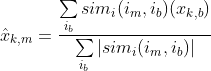

User -Item Similarity : Users who are similar to you also liked
Similarity values between users are measured by observing all the items that are rated by both users.
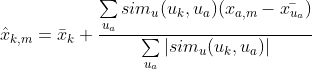

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
df_train, df_test = train_test_split(df_ratings, test_size = 0.25,random_state=42)

In [55]:
n_id_from_all = df_ratings['id_from'].unique().shape[0]
n_id_to_all = df_ratings['id_to'].unique().shape[0]
n_id_from_all, n_id_to_all

(135359, 168791)

In [56]:
n_id_from = df_ratings_sample['id_from'].unique().shape[0]
n_id_to = df_ratings_sample['id_to'].unique().shape[0]
n_id_from, n_id_to

(15874, 12459)

In [57]:
df_ratings_sample['id_to'].unique().shape[0]

12459

In [58]:
df_ratings_sample.shape, df_train.shape, df_test.shape

((4738218, 3), (13019509, 3), (4339837, 3))

In [59]:
for line in df_ratings_sample.itertuples():
    print(line)
    break

Pandas(Index=0, id_from=1, id_to=133, rating=8)


In [60]:
train_data_mat = np.zeros((n_id_from, n_id_to))
train_data_mat.shape

(15874, 12459)

In [61]:
df_test.shape

(4339837, 3)

In [62]:
#Create two user-item matrix, one for training and another for testing
train_data_mat = np.zeros((n_id_from, n_id_to))
# –§–∏–ª—å—Ç—Ä–∞—Ü–∏—è –¥–∞–Ω–Ω—ã—Ö –¥–ª—è –∏—Å–∫–ª—é—á–µ–Ω–∏—è –Ω–µ–¥–æ–ø—É—Å—Ç–∏–º—ã—Ö –∏–Ω–¥–µ–∫—Å–æ–≤
valid_indices = df_train['id_from'].isin(range(1, n_id_from + 1)) & df_train['id_to'].isin(range(1, n_id_to + 1))
filtered_df_train = df_train[valid_indices]
#itertuples gives you content of the row along with it's index
for line in filtered_df_train.itertuples():
  #line[1] - 1 is used to account for index to start from 0, so we get value like
  #train_data_mat[id_from,id_to] = Rating
    train_data_mat[line[1]-1, line[2] -1] = line[3]
test_data_mat = np.zeros((n_id_from, n_id_to))
for line in df_test.itertuples():
    if line[2] in range(1, n_id_to + 1) and line[1] in range(1, n_id_from + 1):
        test_data_mat[line[1]-1, line[2]-1] = line[3]

In [69]:
test_data_mat

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In recommendation system, we commonly use cosine matrix which will treat the ratings given by a specific user as a vector assuming all the null values as 0 rating and then the cosine gives you the measure of similarity as we know cos(0) = 1 so a value of 1 means the users are very similar.

Cosine similiarity for users a and m can be calculated using the formula below, where you take dot product of the user vector  ùë¢ùëò
  and the user vector  ùë¢ùëé
  and divide it by multiplication of the Euclidean lengths of the vectors.
  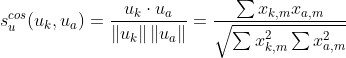

To calculate similarity between items m and b you use the formula:
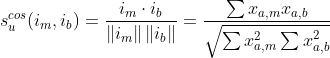

In [63]:
from sklearn.metrics.pairwise import pairwise_distances
id_from_similarity = pairwise_distances(train_data_mat, metric='cosine')
id_to_similarity = pairwise_distances(train_data_mat.T, metric='cosine')

Now we will make prediction based on the similarity of the above calculated matrix. For user based CF, we will use the below formula.
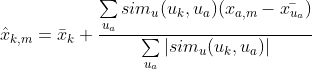
We are subtracting the user mean rating from each rating which would take care of differences between user while rating. Say for example, a user m rates good profile with 8 and the profile he dislikes with 2 and similarly other user a rates movies he likes with 10 and other movies 4. Now both the users have similar taste but they rate differently. After removing the average rating of a user, we also need to normalize so the rating doesn't cross 10. For this we have divided with the

And for item based CF, we will use the below mentioned formula:
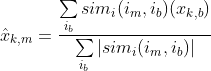

In [64]:
def predict(ratings, similarity, type='user'):
    if type == 'id_from':
        mean_ratings_from = ratings.mean(axis=1)
        #You use np.newaxis so that mean_user_rating has same format as ratings
        ratings_diff = (ratings - mean_ratings_from[:, np.newaxis]) 
        rate_pred = mean_ratings_from[:, np.newaxis] + similarity.dot(ratings_diff) / np.array([np.abs(similarity).sum(axis=1)]).T
    elif type == 'id_to':
        rate_pred = ratings.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])     
    return rate_pred

In [65]:
id_to_prediction = predict(train_data_mat, id_to_similarity, type='id_to')
id_from_prediction = predict(train_data_mat, id_from_similarity, type='id_from')

In [70]:
print(id_to_prediction)

[[0.01095278 0.01064682 0.01091668 ... 0.01092626 0.01091668 0.01091668]
 [0.00386852 0.00382597 0.00385295 ... 0.00385633 0.00385295 0.00385295]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.00241782 0.00240369 0.00240809 ... 0.0024102  0.00240809 0.00240809]
 [0.0047484  0.00484064 0.00489645 ... 0.00485605 0.00489645 0.00489645]
 [0.0013701  0.00132426 0.00136459 ... 0.00136578 0.00136459 0.00136459]]


In [71]:
print(id_from_prediction)

[[ 9.11246241e-03  1.47259169e-02  7.82102114e-03 ...  9.63165107e-03
   7.82102114e-03  7.82102114e-03]
 [ 1.97774881e-03  7.64277748e-03  7.07691439e-04 ...  2.48577176e-03
   7.07691439e-04  7.07691439e-04]
 [-1.90337152e-03  3.76663415e-03 -3.16337278e-03 ... -1.39937101e-03
  -3.16337278e-03 -3.16337278e-03]
 ...
 [ 5.24531076e-04  6.08184844e-03 -7.46126747e-04 ...  1.03279421e-03
  -7.46126747e-04 -7.46126747e-04]
 [ 2.81723263e-03  8.65537171e-03  1.75805455e-03 ...  3.46052821e-03
   1.75805455e-03  1.75805455e-03]
 [-5.19039396e-04  5.03381722e-03 -1.78238437e-03 ... -1.37014050e-05
  -1.78238437e-03 -1.78238437e-03]]


In [79]:
def predi(ratings, similarity, type='user', uid=None):
    if type == 'id_from':
        mean_ratings_from = ratings.mean(axis=1)
        ratings_diff = (ratings - mean_ratings_from[:, np.newaxis])
        rate_pred = mean_ratings_from[:, np.newaxis] + similarity.dot(ratings_diff) / np.array([np.abs(similarity).sum(axis=1)]).T
    elif type == 'id_to':
        rate_pred = ratings.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])
    
    # –í–æ–∑–≤—Ä–∞—â–∞–µ–º –∏–Ω–¥–µ–∫—Å—ã `id_to`, –∫–æ—Ç–æ—Ä—ã–º –±—É–¥–µ—Ç –ø–æ—Å—Ç–∞–≤–ª–µ–Ω–∞ –æ—Ü–µ–Ω–∫–∞ –±–æ–ª—å—à–µ 6
    return np.where(rate_pred > 6)[1]


# –ó–∞–ø—Ä–∞—à–∏–≤–∞–µ–º —É –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è –≤–≤–æ–¥ id –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è
user_id = int(input("–í–≤–µ–¥–∏—Ç–µ id –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è: "))

# –£–±–µ–¥–∏–º—Å—è, —á—Ç–æ –≤–≤–µ–¥–µ–Ω–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –Ω–∞—Ö–æ–¥–∏—Ç—Å—è –≤ –¥–æ–ø—É—Å—Ç–∏–º–æ–º –¥–∏–∞–ø–∞–∑–æ–Ω–µ
if not 1 <= user_id <= df_ratings['id_from'].max():
    print("–û—à–∏–±–∫–∞: –≤–≤–µ–¥–µ–Ω–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ id –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è –≤–Ω–µ –¥–æ–ø—É—Å—Ç–∏–º–æ–≥–æ –¥–∏–∞–ø–∞–∑–æ–Ω–∞.")
    exit()

# –í—ã–∑—ã–≤–∞–µ–º —Ñ—É–Ω–∫—Ü–∏—é predi —Å –≤–≤–µ–¥–µ–Ω–Ω—ã–º –∑–Ω–∞—á–µ–Ω–∏–µ–º id –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è
id_to_prediction = predi(train_data_mat, id_to_similarity, type='id_to', uid=user_id)
id_from_prediction = predi(train_data_mat, id_from_similarity, type='id_from', uid=user_id)

# –û–≥—Ä–∞–Ω–∏—á–∏–≤–∞–µ–º –≤—ã–≤–æ–¥ –¥–æ 10 —ç–ª–µ–º–µ–Ω—Ç–æ–≤
print("–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–µ id_to, –∫–æ—Ç–æ—Ä—ã–º –±—É–¥–µ—Ç –ø–æ—Å—Ç–∞–≤–ª–µ–Ω–∞ –æ—Ü–µ–Ω–∫–∞ –≤—ã—à–µ 6:")
for i in range(min(10, len(id_to_prediction))):
    print(id_to_prediction[i])

print("–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–µ id_from, –∫–æ—Ç–æ—Ä—ã–º –±—É–¥–µ—Ç –ø–æ—Å—Ç–∞–≤–ª–µ–Ω–∞ –æ—Ü–µ–Ω–∫–∞ –≤—ã—à–µ 6:")
for i in range(min(10, len(id_from_prediction))):
    print(id_from_prediction[i])

# –¢–µ–ø–µ—Ä—å –∏—Å–ø–æ–ª—å–∑—É–µ–º —Ñ—É–Ω–∫—Ü–∏—é `predict` –¥–ª—è –ø–æ–ª—É—á–µ–Ω–∏—è `id_to`
#id_to_prediction = predict2(train_data_mat, id_to_similarity, type='id_to')
#id_from_prediction = predict2(train_data_mat, id_from_similarity, type='id_from')

–í–≤–µ–¥–∏—Ç–µ id –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è: 98447
–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–µ id_to, –∫–æ—Ç–æ—Ä—ã–º –±—É–¥–µ—Ç –ø–æ—Å—Ç–∞–≤–ª–µ–Ω–∞ –æ—Ü–µ–Ω–∫–∞ –≤—ã—à–µ 6:
–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–µ id_from, –∫–æ—Ç–æ—Ä—ã–º –±—É–¥–µ—Ç –ø–æ—Å—Ç–∞–≤–ª–µ–Ω–∞ –æ—Ü–µ–Ω–∫–∞ –≤—ã—à–µ 6:
